<a href="https://colab.research.google.com/github/MidoriTinto/Python_For_Data_Analysis/blob/main/Projects/Investigating_the_Inside_Movie_Database_(IMDb)_(Python_and_SQL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Using SQL to investigate the Inside Movie Database (IMDb)**

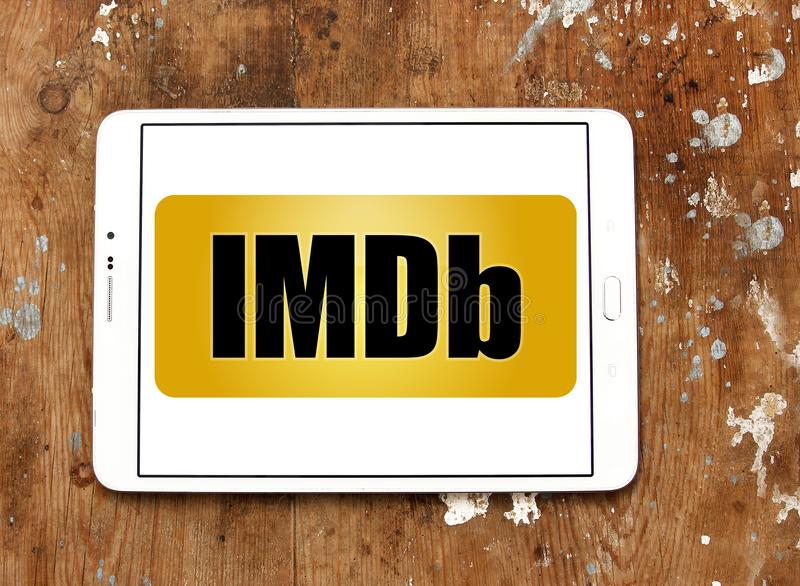

Here, SQL in conjunction with Python will be used to retrive information from the IMDb database. Before starting, the mysql.connector needs to be installed (this has to happened everytime the notebook is open) so the it can connect to the database and the queries can be run.

### Install the SQL library mysql.connector
---


Installing the mysql.connector library which will connect to the database and run the queries.  


In [2]:
# colab does not have mysql automatically installed, so you must run this code once to install it each time you reopen the colab document
!pip install mysql.connector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.9 MB 22.7 MB/s 
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp37-cp37m-linux_x86_64.whl size=247965 sha256=cec4ae9334300038346db4a0046da768ddd3b4aeb76998a45592f300c5c98d62
  Stored in directory: /root/.cache/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7
Successfully built mysql.connector


Each time you write new code to use the functions of the mysql.connector library, you need to add an import at the top of the code cell

`import mysql.connector`


# **Structure of the Inside Movie Database (IMDb)**
---

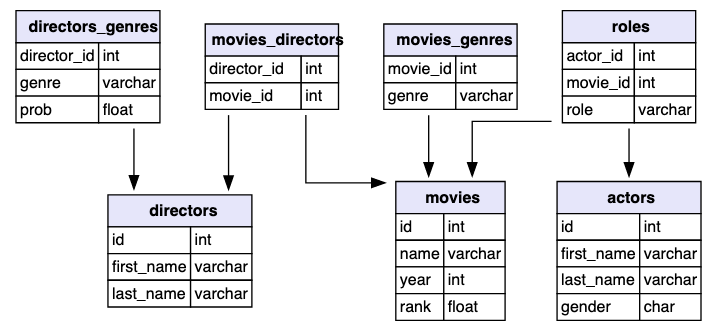

### ***Reading the IMDB SQL database into python***
---
Load in the IMDB database and run the execute_query() function. The location of the database is as follows:
```
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"
  ```
* show the tables in the database
* print the number of records in each of the tables




*Loading the IMDB database using the execute_query()*

In [3]:
import mysql.connector

# add the database configuration code from above here
mydb = mysql.connector.connect(
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"    
)

# executing the query to get the name of columns on the table
def execute_query(query):
  mycursor = mydb.cursor()
  mycursor.execute(query)
  try:
    records = mycursor.fetchall()
    return records
  except:
    print("An error occurred: ")
    return None


# run a query using the execute query function
x=execute_query("SHOW TABLES")#execute_query called SHOW TABLE
for table in x:
  print(table[0])



actors
directors
directors_genres
movies
movies_directors
movies_genres
roles


*The database contains seven columns as shown above*

***How many actors are in the database?***

To find out the number of records per column a loop was used to go through the table.

In [ ]:
actors=execute_query("SELECT COUNT(*) FROM actors")#execute_query called SHOW TABLE
for actor in actors:
  print("actors:", actor[0])#result is tuples - not able to change it. by entering the first item of the table we are accessing the table

actors: 817718


***How many directors in the database?***

In [ ]:
directors=execute_query("SELECT COUNT(*) FROM directors")
for director in directors:
  print("directors: ", director[0])

directors:  86880


***How many directors_genres (genres directors have produced)?***

In [ ]:
genres=execute_query("SELECT COUNT(*) FROM directors_genres")
for genre in genres:
  print("directors_genres: ", genre[0])

directors_genres:  156562


***How many movies are in the database?***

In [ ]:
movies=execute_query("SELECT COUNT(*) FROM movies")
for movie in movies:
  print("movies: ", movie[0])

movies:  roles


***How many movies genres are in the database?***

In [ ]:
m_genres=execute_query("SELECT COUNT(*) FROM movies_genres")
for m_genre in m_genres:
  print("movies_genres: ", m_genre[0])

movies_genres:  395119


***How many roles are in the database?***

In [ ]:
roles=execute_query("SELECT COUNT(*) FROM roles")
for role in roles:
  print("roles: ", role[0])

roles:  3431966


### ***Selecting all columns from  table MOVIES printing only the first 5 rows***
---
   


In [ ]:
import mysql.connector

# add the database configuration code from above here
mydb = mysql.connector.connect(
  host="relational.fit.cvut.cz",
  port="3306",
  user ="guest",
  password ="relational",
  database="imdb_ijs"    
)

def get_movies():  
 
  # using the execute_query() function you ran earlier and a select statement, return the first 5 movies

  movies=execute_query("SELECT * FROM movies LIMIT 5")#execute_query shows the first 5 rows in the movies Table
  for movie in movies:
    print(movie)
   
  return movies

# this code will run and test if the length of the array returned from your function is correct
actual = len(get_movies())
expected = 5

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed, expected", expected, "got", actual)

#get_movies()

(0, '#28', 2002, None)
(1, '#7 Train: An Immigrant Journey, The', 2000, None)
(2, '$', 1971, 6.4)
(3, '$1,000 Reward', 1913, None)
(4, '$1,000 Reward', 1915, None)
Test passed 5


### ***Selecting movies made after 2007***

*Expected Output*  
[('Harry Potter and the Half-Blood Prince', 2008)]

In [ ]:
import mysql.connector

# add the database configuration code from above here
mydb = mysql.connector.connect(
host="relational.fit.cvut.cz",
port="3306",
user ="guest",
password ="relational",
database="imdb_ijs"   
  )

def get_new_movies():

  movies=execute_query("SELECT name, year FROM movies WHERE year>'2007'")
  print(movies)


  return movies
# This code will run and test if length of returned array is same as expected, here we are looking for only one record
actual = len(get_new_movies())
expected = 1

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed, expected", expected, "got", actual)

# This code will run the function and show the output



[('Harry Potter and the Half-Blood Prince', 2008)]
Test passed 1


### ***Selecting on two criteria (year and rank)***
---

We are now looking at movies made in 2000 that were ranked above 9. Print the names one per line, then the number of films.

*Expected output*:
There are 45 records

In [ ]:
import mysql.connector

# add the database configuration code from above here
mydb = mysql.connector.connect(
host="relational.fit.cvut.cz",
port="3306",
user ="guest",
password ="relational",
database="imdb_ijs"   
  )

def get_new_movies():

  movies=execute_query("SELECT name FROM movies WHERE year='2000' AND rank>'9'")#execute_query shows the first 5 rows in the movies Table
  #print(movies)
  numbers=execute_query("SELECT COUNT(name) FROM movies WHERE year='2000' AND rank>'9'")#execute_query called SHOW TABLE
  print(numbers[0][0])
  for movie in movies:
   print(movie[0])#print number of movies 

  #return movies#return a list of all movies
  
get_new_movies()

45
36K
Amazones 2000
Amor
Anno Domini
As I Was Moving Ahead Occasionally I Saw Brief Glimpses of Beauty
Auslandstournee
Cartas da Me
Christmas Tree and a Wedding, A
Clockwork Maury, A
David Nelson Live
Don't Kill
Dr. Babasaheb Ambedkar
Era outra vez
Etat
Funeral de los dedos, El
Funky Town
Game Day
Holocaust szemei, A
Innocents Mission, The
Johnny the Amazing Firetruck
Judy's Time
Kairee
Kehrwoche
Laatste Joegoslavische elftal, Het
Latitude Zero
Man On Lincoln's Nose, The
Markova: Comfort Gay
Moving Illustrations of Machines
Mnchen - Geheimnisse einer Stadt
Our House: A Very Real Documentary About Kids of Gay & Lesbian Parents
Pantalones
Plus rien...
Prison Life
Puzzle, The
Reshimat Ahava
Rhapsody in Blue
Robbers
Sevda heit Liebe
Stagestruck: Gay Theatre in the 20th Century
Sunday Morning
Un amor de Borges
Warpath
Wrestling with Shadows
Zero
ber lmok


### **Linking data from two tables to find all comedy films**
---
Selecting the `name` of all comedies using the movies and movies_genres tables, joining them by the id column in the movies table and the movie_id column in the movies_genres table.

Constructing the SQL query:
*  SELECT both tables (movies, movies_genres)
*  add the condition WHERE the id in movies (movies.id) is the same as the movie_id in movies_genres (movies_genres.movie_id)
*  AND the second condition movies_genres.genre = 'comedy'

```
SELECT table1, table2 WHERE table1.column = table2.column1 AND table2.column2 = value
```

**Expected output**  
`[('$',),
 ('$1,000,000 Duck',),
 ('$10,000 Under a Pillow',),
 ('$1000 a Touchdown',),
 ('$30',)]`




In [ ]:
def get_comedies():

 two_tables=execute_query("SELECT name FROM movies, movies_genres WHERE movies.id=movies_genres.movie_id AND  movies_genres.genre = 'comedy'")
 #print(two_tables)
 return two_tables



# This code will run and test if length of returned array is same as expected
actual = len(get_comedies())
expected = 56425

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed, expected", expected, "got", actual)


# This code will run the function and show the first five rows
get_comedies()[0:5]

Test passed 56425


[('$',),
 ('$1,000,000 Duck',),
 ('$10,000 Under a Pillow',),
 ('$1000 a Touchdown',),
 ('$30',)]

### ***Linking data from three tables to get Quentin Tarantino films (linking 3 tables)***
---
Select the names of movies directed by Quentin Tarantino.
This requires to join by ***ID*** using the ***movies, movies_directors and directors*** tables  like this:

* SELECT name
* FROM the three tables
* WHERE the directors id matches
* AND the movies id and movies_directors id match
* AND the director's first name is Quentin and last name is Tarantino

*Expected output*  

`[('Carga mortal',),
 ('"Conquest"',),
 ('Courting Courtney',),
 ('Four Rooms',),
 ('Inglorious Bastards',)]`

In [ ]:
def get_tarantino():

 directors=execute_query("SELECT name FROM movies, movies_directors, directors WHERE  movies_directors.director_id=directors.id AND movies.id=movies_directors.movie_id AND directors.first_name='Quentin' AND directors.last_name='Tarantino'")
 #print(directors)
 return directors



# This code will run and test if length of returned array is same as expected
actual = len(get_tarantino())
expected = 10

if actual == expected:
  print("Test passed", actual)
else:
  print("Test failed, expected", expected, "got", actual)

# This code will run the function and show the first 10 rows
get_tarantino()



Test passed 10


[('Four Rooms',),
 ('Inglorious Bastards',),
 ('Jackie Brown',),
 ('Kill Bill: Vol. 1',),
 ('Kill Bill: Vol. 2',),
 ("My Best Friend's Birthday",),
 ('Pulp Fiction',),
 ('Reservoir Dogs',),
 ('"ER"',),
 ('"Jimmy Kimmel Live"',)]

### ***Read an SQL query into a pandas dataframe*** 
---

SQL is a powerful tool for reading data from across tables in a relational database into one table that can be analysed with statistical tools designed to operate on single data tables, such as pandas dataframes.  

To read an SQL query into a pandas dataframe we can replace execute_query with pd.read_sql_query(), giving it the query and the database

`df = pd.read_sql_query(query, database)`


For example:
```
query = "SELECT * FROM movies"
df = pd.read_sql_query(query, mydb)
```


### ***Creating a movies dataframe***
---

Pandas provide a function that will execute a query on a connected database and format the result into a dataframe

The query as it would be written in 'plain' SQL:
```
SELECT first_name, last_name, name, year, rank, genre FROM directors, movies, movies_genres, movies_directors WHERE movies.id = movies_directors.movie_id AND movies.id = movies_genres.movie_id AND directors.id = movies_directors.director_id
```
will:

*  SELECT the fields first_name FROM directors
*  SELECT the fields name, year, rank FROM movies
*  SELECT the field genre FROM movies_genres
*  WHERE the ids match in movies and movies_directors
*  AND the ids match movies and movies_genres
*  AND the ids match in directors and movies directors

Add the query to the code below, which will then create a dataframe from the output.  Use the `pd.read_sql_query` function to read this query into a pandas dataframe called **movies_df**

In [ ]:
import pandas as pd
from google.colab import files

def get_movies_data():
  query = "SELECT first_name, last_name, name, year, rank, genre FROM directors, movies, movies_genres, movies_directors WHERE movies.id = movies_directors.movie_id AND movies.id = movies_genres.movie_id AND directors.id = movies_directors.director_id"
  df = pd.read_sql_query(query, mydb)
  df. to_csv('movies.csv')
  files.download('movies.csv')
  return df

# This code will test if your movies_df variable is a valid pandas dataframe 
movies_df = get_movies_data()
if isinstance(movies_df,pd.DataFrame):
  print("Test passed, variable is a pandas dataframe")
else:
  print("Test failed, not a pandas dataframe")

# This will show the first part of the dataframe
movies_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test passed, variable is a pandas dataframe


,first_name,last_name,name,year,rank,genre
0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


# Notes
----

Combining Python and SQL requires a bit more to get used to. Probability of inserting errors when entering commands is higher due to the combination of languages. 